**------------------------Questions Covered-----------------------------**

***2	Searching & Sorting	https://www.geeksforgeeks.org/radix-sort/	Pep_JavaIP_2SnS_61RadixSort																								
2	Searching & Sorting	https://www.geeksforgeeks.org/how-to-efficiently-sort-a-big-list-dates-in-20s/	Pep_JavaIP_2SnS_62SortDates																								
2	Searching & Sorting	https://www.geeksforgeeks.org/median-of-stream-of-integers-running-integers/	Pep_JavaIP_2SnS_63MedianofStreamofIntegers																								
2	Searching & Sorting	https://www.geeksforgeeks.org/make-array-elements-equal-minimum-cost/	Pep_JavaIP_2SnS_64MinimumCostToMakeArrayElements																								
2	Searching & Sorting	https://www.geeksforgeeks.org/check-reversing-sub-array-make-array-sorted/	Pep_JavaIP_2SnS_65ReverseSorted																								
2	Searching & Sorting	https://www.geeksforgeeks.org/print-all-subarrays-with-0-sum/	Pep_JavaIP_2SnS_66PrintAllSubarraysWith0Sum																								
2	Searching & Sorting	https://www.geeksforgeeks.org/nearly-sorted-algorithm/	heap with array, good logic																								
2	Searching & Sorting	https://www.geeksforgeeks.org/a-product-array-puzzle/	Pep_JavaIP_2SnS_68ProductArrayPuzzle																								
2	Searching & Sorting	https://www.geeksforgeeks.org/find-number-pairs-xy-yx/	Pep_JavaIP_2SnS_69CountPairsXY																								
2	Searching & Sorting	https://www.geeksforgeeks.org/find-duplicates-in-on-time-and-constant-extra-space/	Pep_JavaIP_2SnS_70FindDuplicates		https://www.geeksforgeeks.org/duplicates-array-using-o1-extra-space-set-2/																						
2	Searching & Sorting	https://www.geeksforgeeks.org/insert-in-sorted-and-non-overlapping-interval-array/	Pep_JavaIP_2SnS_71InsertionAndMergingIntervals	breaker																							
2	Searching & Sorting	https://www.geeksforgeeks.org/sort-array-according-count-set-bits/	Pep_JavaIP_2SnS_72SortOnCountSetBits	breaker																							
2	Searching & Sorting	https://www.geeksforgeeks.org/minimum-swaps-to-make-two-array-identical/	Pep_JavaIP_2SnS_73MinimumSwaps																								
2	Searching & Sorting	https://www.geeksforgeeks.org/find-largest-multiple-3-array-digits-set-2-time-o1-space/	Pep_JavaIP_2SnS_74MaximumMultipleOf3	breaker																							
2	Searching & Sorting	https://www.geeksforgeeks.org/permute-two-arrays-sum-every-pair-greater-equal-k/	Pep_JavaIP_2SnS_75PermuteTwoArrays***

In [1]:
import java.util.*;
import java.io.*;
import java.util.Arrays;
String[] args =new String[0];

## **61. Radix Sort**
https://www.geeksforgeeks.org/radix-sort/

In [2]:
/*
The lower bound for Comparison based sorting algorithm (Merge Sort, Heap Sort, Quick-Sort .. etc) is Ω(nLogn), 
i.e., they cannot do better than nLogn.
Counting sort is a linear time sorting algorithm that sort in O(n+k) time when elements are in range from 1 to k.
*/

In [3]:
/*
What if the elements are in range from 1 to n^2?
    We can’t use counting sort 
    because counting sort will take O(n^2) which is worse than comparison based sorting algorithms. 

Can we sort such an array in linear time?
    Radix Sort is the answer. 
    The idea of Radix Sort is to do digit by digit sort starting from least significant digit to most significant digit. 
    Radix sort uses counting sort as a subroutine to sort.
*/

In [4]:
/*
The Radix Sort Algorithm
1) Do following for each digit i where i varies from least significant digit to the most significant digit.
………….a) Sort input array using counting sort (or any stable sort) according to the i’th digit.

Example:
Original, unsorted list:
    170, 45, 75, 90, 802, 24, 2, 66

Sorting by least significant digit (1s place) gives: 
[*Notice that we keep 802 before 2, because 802 occurred before 2 in the original list, and similarly for pairs 170 & 90 and 45 & 75.]
    170, 90, 802, 2, 24, 45, 75, 66

Sorting by next digit (10s place) gives: 
[*Notice that 802 again comes before 2 as 802 comes before 2 in the previous list.]
    802, 2, 24, 45, 66, 170, 75, 90

Sorting by most significant digit (100s place) gives:
    2, 24, 45, 66, 75, 90, 170, 802
*/

In [5]:
/*
What is the running time of Radix Sort?
    Let there be d digits in input integers. 
    Radix Sort takes O(d*(n+b)) time where b is the base for representing numbers, 
    for example, 
    for decimal system, b is 10. 
    What is the value of d? 
        If k is the maximum possible value, 
        then d would be O(logb(k)). 
        So overall time complexity is O((n+b) * logb(k)). 
        Which looks more than the time complexity of comparison based sorting algorithms for a large k. 
        Let us first limit k. Let k <= nc where c is a constant. 
        In that case, the complexity becomes O(nLogb(n)). But it still doesn’t beat comparison based sorting algorithms.
    What if we make value of b larger?. 
    What should be the value of b to make the time complexity linear? 
        If we set b as n, we get the time complexity as O(n). 
        In other words, we can sort an array of integers with range from 1 to n^c 
        if the numbers are represented in base n (or every digit takes log2(n) bits).
*/

In [6]:
/*
Is Radix Sort preferable to Comparison based sorting algorithms like Quick-Sort?
    If we have log2n bits for every digit, 
    the running time of Radix appears to be better than Quick Sort for a wide range of input numbers. 
    The constant factors hidden in asymptotic notation are higher for Radix Sort and Quick-Sort uses hardware caches more effectively. 
    Also, Radix sort uses counting sort as a subroutine and counting sort takes extra space to sort numbers.
*/

In [7]:
// A utility function to get maximum value in arr[] 
static int getMax(int arr[], int n) 
{ 
    int mx = arr[0]; 
    for (int i = 1; i < n; i++) 
        if (arr[i] > mx) 
            mx = arr[i]; 
    return mx; 
} 

In [8]:
// A function to do counting sort of arr[] according to 
// the digit represented by exp. 
static void countSort(int arr[], int n, int exp) 
{ 
    int output[] = new int[n]; // output array 
    int i; 
    int count[] = new int[10]; 
    Arrays.fill(count,0); 

    // Store count of occurrences in count[] 
    for (i = 0; i < n; i++) 
        count[ (arr[i]/exp)%10 ]++; 

    // Change count[i] so that count[i] now contains 
    // actual position of this digit in output[] 
    for (i = 1; i < 10; i++) 
        count[i] += count[i - 1]; 

    // Build the output array 
    for (i = n - 1; i >= 0; i--) 
    { 
        output[count[ (arr[i]/exp)%10 ] - 1] = arr[i]; 
        count[ (arr[i]/exp)%10 ]--; 
    } 

    // Copy the output array to arr[], so that arr[] now 
    // contains sorted numbers according to curent digit 
    for (i = 0; i < n; i++) 
        arr[i] = output[i]; 
} 

In [9]:
// The main function to that sorts arr[] of size n using 
// Radix Sort 
static void radixsort(int arr[], int n) 
{ 
    // Find the maximum number to know number of digits 
    int m = getMax(arr, n); 

    // Do counting sort for every digit. Note that instead 
    // of passing digit number, exp is passed. exp is 10^i 
    // where i is current digit number 
    for (int exp = 1; m/exp > 0; exp *= 10) 
        countSort(arr, n, exp); 
} 

In [10]:
// A utility function to print an array 
static void print(int arr[], int n) 
{ 
    for (int i=0; i<n; i++) 
        System.out.print(arr[i]+" "); 
} 


/*Driver function to check for above function*/
public static void main (String[] args) 
{ 
    int arr[] = {170, 45, 75, 90, 802, 24, 2, 66}; 
    int n = arr.length; 
    radixsort(arr, n); 
    print(arr, n); 
}
main(args);

2 24 45 66 75 90 170 802 

***https://youtu.be/nu4gDuFabIM***

## **62. How to efficiently sort a big list dates in 20’s**
https://www.geeksforgeeks.org/how-to-efficiently-sort-a-big-list-dates-in-20s/

In [11]:
/*
Given a big list of dates in 20’s, how to efficiently sort the list.
*/

In [12]:
/*
Example:

Input:
       Date arr[] = {{20,  1, 2014},
                    {25,  3, 2010},
                    { 3, 12, 2000},
                    {18, 11, 2001},
                    {19,  4, 2015},
                    { 9,  7, 2005}}

Output:
      Date arr[] = {{ 3, 12, 2000},
                    {18, 11, 2001},
                    { 9,  7, 2005},
                    {25,  3, 2010},
                    {20,  1, 2014},
                    {19,  4, 2015}}
*/

In [13]:
/*
A Simple Solution is to use a O(nLogn) algorithm like Merge Sort.

We can sort the list in O(n) time using Radix Sort. 
In a typical Radix Sort implementation, we first sort by last digit, then by second last digit, and so on. 
Here we sort in following order.
    1) First sort by day using counting sort
    2) Then sort by month using counting sort
    3) Finally sort by year using counting sort

As the number of days, months and years are fixed, all three steps take O(n) time. 
Therefore, overall time complexity is O(n).
*/

***https://ideone.com/808Pg5***

In [14]:
class Date{
    int day;
    int month;
    int year;
    Date(int day,int month,int year){
        this.day=day;
        this.month=month;
        this.year=year;
    }
    public String toString(){
        Formatter fm=new Formatter();
        String str= fm.format("%3d%3d%5d",day,month,year).toString();
        fm.close();
        return str;
    }
}

In [15]:
class MyComp implements Comparator<Date>{
    public int compare(Date d1,Date d2){
        if(d1.year<d2.year){
            return -1;
        }else if(d1.year==d2.year){
            if(d1.month<d2.month){
                return -1;
            }else if(d1.month==d2.month){
                if(d1.day<=d2.day)return -1;
                else return 1;
            }else{
                return 1;
            }
        }else{
            return 1;
        }
    }
}

In [16]:
public static void main(String[] args){
    Date[] date={
            new Date(20,  1, 2014),
            new Date(25, 3, 2010),
            new Date(3, 12, 2000),
            new Date(18, 11, 2001),
            new Date(19, 4, 2015),
            new Date(9, 7, 2005)
    };
    System.out.println("Input Dates");
    for(Date d:date){
        System.out.println(d);
    }
    Arrays.sort(date,new MyComp());
    System.out.println("\nSorted Dates");
    for(Date d:date){
        System.out.println(d);
    }
}
main(args);

Input Dates
 20  1 2014
 25  3 2010
  3 12 2000
 18 11 2001
 19  4 2015
  9  7 2005

Sorted Dates
  3 12 2000
 18 11 2001
  9  7 2005
 25  3 2010
 20  1 2014
 19  4 2015


## **63. Median in a stream of integers (running integers)**
https://www.geeksforgeeks.org/median-of-stream-of-integers-running-integers/

In [17]:
/*
Given that integers are read from a data stream. 
Find median of elements read so for in efficient way. 
For simplicity assume there are no duplicates. 

For example, let us consider the stream 5, 15, 1, 3 …

    After reading 1st element of stream - 5 -> median - 5
    After reading 2nd element of stream - 5, 15 -> median - 10
    After reading 3rd element of stream - 5, 15, 1 -> median - 5
    After reading 4th element of stream - 5, 15, 1, 3 -> median - 4, so on...
*/

In [18]:
/*
Making it clear, 
when the input size is odd, we take the middle element of sorted data. 
If the input size is even, we pick average of middle two elements in sorted stream.

Note that output is effective median of integers read from the stream so far. 
Such an algorithm is called online algorithm. 
Any algorithm that can guarantee output of i-elements after processing i-th element, is said to be online algorithm. 
Let us discuss three solutions for the above problem.
*/

In [19]:
/*
Method 1: Insertion Sort

If we can sort the data as it appears, we can easily locate median element. 
Insertion Sort is one such online algorithm that sorts the data appeared so far. 
At any instance of sorting, say after sorting i-th element, the first i elements of array are sorted. 
The insertion sort doesn’t depend on future data to sort data input till that point. 
In other words, insertion sort considers data sorted so far while inserting next element. 
This is the key part of insertion sort that makes it an online algorithm.

However, insertion sort takes O(n^2) time to sort n elements. 
Perhaps we can use binary search on insertion sort to find location of next element in O(log n) time. 
Yet, we can’t do data movement in O(log n) time. 
No matter how efficient the implementation is, it takes polynomial time in case of insertion sort.
*/

In [20]:
/*
Method 2: Augmented self balanced binary search tree (AVL, RB, etc…)

At every node of BST, maintain number of elements in the subtree rooted at that node. 
We can use a node as root of simple binary tree, 
whose left child is self balancing BST with elements less than root and right child is self balancing BST with elements greater than root. 
The root element always holds effective median.

If left and right subtrees contain same number of elements, 
    root node holds average of left and right subtree root data. 
Otherwise, root contains same data as the root of subtree which is having more elements. 
After processing an incoming element, the left and right subtrees (BST) are differed utmost by 1.

Self balancing BST is costly in managing balancing factor of BST. 
However, they provide sorted data which we don’t need. 
We need median only. The next method make use of Heaps to trace median.
*/

In [21]:
/*
Method 3: Heaps
Time Complexity: If we omit the way how stream was read, complexity of median finding is O(N log N), as we need to read the stream, and due to heap insertions/deletions.


Similar to balancing BST in Method 2 above, 
we can use a max heap on left side to represent elements that are less than effective median, 
and a min heap on right side to represent elements that are greater than effective median.

After processing an incoming element, the number of elements in heaps differ utmost by 1 element. 
When both heaps contain same number of elements, we pick average of heaps root data as effective median. 
When the heaps are not balanced, we select effective median from the root of heap containing more elements.

Given below is implementation of above method. For algorithm to build these heaps, please read the highlighted code.
*/

***https://ideone.com/SLthBb***

***Median of Stream of Running Integers using STL***

***https://www.geeksforgeeks.org/median-of-stream-of-running-integers-using-stl/***

## **64. Make all array elements equal with minimum cost**
https://www.geeksforgeeks.org/make-array-elements-equal-minimum-cost/

In [22]:
/*
Given an array which contains integer values, 
we need to make all values of this array equal to some integer value with minimum cost 
where the cost of changing an array value x to y is abs(x-y).
*/

In [23]:
/*
Examples :

Input  : arr[] = [1, 100, 101]
Output : 100
We can change all its values to 100 with minimum cost,
|1 - 100| + |100 - 100| + |101 - 100| = 100

Input  : arr[] = [4, 6]
Output : 2
We can change all its values to 5 with minimum cost,
|4 - 5| + |5 - 6| = 2
*/

In [24]:
/*
This problem can be solved by observing the cost while changing the target equal value, 
i.e. we will see the change in cost when target equal value is changed. 
It can be observed that, 
    as we increase the target equal value the total cost decreases up to a limit and then starts increasing 
    i.e. the cost graph with respect to target equal value is of U-shape 
    and as cost graph is in U-shape, 
        the ternary search can be applied to this search space and our goal is to get that bottom most point of the curve which will represent the smallest cost. 
    We will make smallest and largest value of the array as the limit of our search space 
    and then we will keep skipping 1/3 part of the search space until we reach to the bottom most point of our U-curve.
Please see below code for better understanding,

Time Complexity : O (n Log n)
*/

In [25]:
// Utility method to compute cost, when 
// all values of array are made equal to X 
public static int computeCost(int arr[], int N, 
                              int X) 
{ 
    int cost = 0; 
    for (int i = 0; i < N; i++) 
        cost += Math.abs(arr[i] - X); 
    return cost; 
} 

In [26]:
// Method to find minimum cost to make all 
// elements equal 
public static int minCostToMakeElementEqual(int arr[], 
                                            int N) 
{ 
    int low, high; 
    low = high = arr[0]; 

    // setting limits for ternary search by 
    // smallest and largest element 
    for (int i = 0; i < N; i++) { 
        if (low > arr[i]) 
            low = arr[i]; 
        if (high < arr[i]) 
            high = arr[i]; 
    } 

    /* loop until difference between low and high 
       become less than 3, because after that 
       mid1 and mid2 will start repeating 
    */
    while ((high - low) > 2) { 
        // mid1 and mid2 are representative array 
        // equal values of search space 
        int mid1 = low + (high - low) / 3; 
        int mid2 = high - (high - low) / 3; 

        int cost1 = computeCost(arr, N, mid1); 
        int cost2 = computeCost(arr, N, mid2); 

        // if mid2 point gives more total cost, 
        // skip third part 
        if (cost1 < cost2) 
            high = mid2; 

        // if mid1 point gives more total cost, 
        // skip first part 
        else
            low = mid1; 
    } 

    // computeCost gets optimum cost by sending 
    // average of low and high as X 
    return computeCost(arr, N, (low + high) / 2); 
} 

In [27]:
/* Driver program to test above function */
public static void main(String[] args) 
{ 
    int arr[] = { 1, 100, 101 }; 
    int N = arr.length; 
    System.out.println(minCostToMakeElementEqual(arr, N)); 
} 
main(args);

100


## **65. Check if reversing a sub array make the array sorted**
https://www.geeksforgeeks.org/check-reversing-sub-array-make-array-sorted/

In [28]:
/*
Given an array of distinct n integers. 
The task is to check whether reversing one sub-array make the array sorted or not. 
If the array is already sorted or by reversing a subarray once make it sorted, 
    print “Yes”, 
else 
    print “No”.
*/

In [29]:
/*
Examples:

Input : arr [] = {1, 2, 5, 4, 3}
Output : Yes
By reversing the subarray {5, 4, 3}, 
the array will be sorted.

Input : arr [] = { 1, 2, 4, 5, 3 }
Output : No
*/

In [30]:
/*
Method 1 (Simple : O(n2)
A simple solution is to consider every subarray one by one. 
Try reversing every subarray and check if reversing the subarray makes the whole array sorted. 
If yes, 
    return true. 
If reversing any subarray doesn’t make the array sorted, 
    then return false.
*/

In [31]:
/*
Method 2 (Sorting : O(nlogn)):
The idea is to compare the given array with the sorted array. 
Make a copy of the given array and sort it. 
Now, find the first index and last index which do not match with sorted array. 
If no such indices are found, 
    print “Yes”. 
Else 
    check if the elements between the indices are in decreasing order.
*/

In [32]:
// Return true, if reversing the subarray will  
// sort the array, else return false.  
static boolean checkReverse(int arr[], int n) { 
    // Copying the array.  
    int temp[] = new int[n]; 
    for (int i = 0; i < n; i++) { 
        temp[i] = arr[i]; 
    } 

    // Sort the copied array.  
    Arrays.sort(temp); 

    // Finding the first mismatch.  
    int front; 
    for (front = 0; front < n; front++) { 
        if (temp[front] != arr[front]) { 
            break; 
        } 
    } 

    // Finding the last mismatch.  
    int back; 
    for (back = n - 1; back >= 0; back--) { 
        if (temp[back] != arr[back]) { 
            break; 
        } 
    } 

    // If whole array is sorted  
    if (front >= back) { 
        return true; 
    } 

    // Checking subarray is decreasing or not.  
    do { 
        front++; 
        if (arr[front - 1] < arr[front]) { 
            return false; 
        } 
    } while (front != back); 

    return true; 
} 

In [33]:
// Driven Program  
public static void main(String[] args) { 

    int arr[] = {1, 2, 5, 4, 3}; 
    int n = arr.length; 

    if (checkReverse(arr, n)) { 
        System.out.print("Yes"); 
    } else { 
        System.out.print("No"); 
    } 
} 
main(args);

Yes

In [34]:
/*
Method 3 (Linear : O(n)):
Observe, answer will be “Yes” when the array is sorted or when the array consist of three parts. 
    1. First part is increasing subarray, then decreasing subarray and then again increasing subarray. 
        So, we need to check that array contain increasing elements then some decreasing elements and then increasing elements. 
    2. In all other case, answer will be “No”.
*/

In [35]:
// Return true, if reversing the subarray will sort t  
// he array, else return false.  
static boolean checkReverse(int arr[], int n) { 
    if (n == 1) { 
        return true; 
    } 

    // Find first increasing part  
    int i; 
    for (i = 1; arr[i - 1] < arr[i] && i < n; i++); 
    if (i == n) { 
        return true; 
    } 

    // Find reversed part  
    int j = i++; 
    while (arr[j] < arr[j - 1]) { 
        if (i > 1 && arr[j] < arr[i - 2]) { 
            return false; 
        } 
        j++; 
    } 

    if (j == n) { 
        return true; 
    } 

    // Find last increasing part  
    int k = j; 

    // To handle cases like {1,2,3,4,20,9,16,17}  
    if (arr[k] < arr[i - 1]) { 
        return false; 
    } 

    while (k > 1 && k < n) { 
        if (arr[k] < arr[k - 1]) { 
            return false; 
        } 
        k++; 
    } 
    return true; 
}

In [36]:
// Driven Program  
public static void main(String[] args) { 

    int arr[] = {1, 3, 4, 10, 9, 8}; 
    int n = arr.length; 

    if (checkReverse(arr, n)) { 
        System.out.print("Yes"); 
    } else { 
        System.out.print("No"); 
    } 
} 
main(args);

No

## **66. Print all subarrays with 0 sum**
https://www.geeksforgeeks.org/print-all-subarrays-with-0-sum/

In [37]:
/*
Given an array, print all subarrays in the array which has sum 0.
*/

In [38]:
/*
Examples:

Input:  arr = [6, 3, -1, -3, 4, -2, 2, 4, 6, -12, -7]
Output:  
Subarray found from Index 2 to 4
Subarray found from Index 2 to 6          
Subarray found from Index 5 to 6
Subarray found from Index 6 to 9
Subarray found from Index 0 to 10
*/

In [39]:
/*
A simple solution is to consider all subarrays one by one and check if sum of every subarray is equal to 0 or not. 
The complexity of this solution would be O(n^2).
*/

In [40]:
/*
A better approach is to use Hashing.

Do following for each element in the array

    1. Maintain sum of elements encountered so far in a variable (say sum).
    2. If current sum is 0, we found a subarray starting from index 0 and ending at index current index/
    3. Check if current sum exists in the hash table or not.
    4. If current sum already exists in the hash table 
       then it indicates that this sum was the sum of some sub-array elements arr[0]…arr[i] 
       and now the same sum is obtained for the current sub-array arr[0]…arr[j] 
       which means that the sum of the sub-array arr[i+1]…arr[j] must be 0.
    5. Insert current sum into the hash table
Below is a dry run of the above approach:
*/

<img src = "https://media.geeksforgeeks.org/wp-content/cdn-uploads/20190703111645/ZeroSumSubarrays.png"/>

In [41]:
// User defined pair class 
class Pair  
{ 
    int first, second; 
    Pair(int a, int b)  
    { 
        first = a; 
        second = b; 
    } 
} 

In [42]:
// Function to print all subarrays in the array which  
// has sum 0 
static ArrayList<Pair> findSubArrays(int[] arr, int n) 
{ 
        // create an empty map  
        HashMap<Integer,ArrayList<Integer>> map = new HashMap<>(); 

        // create an empty vector of pairs to store  
        // subarray starting and ending index  
        ArrayList<Pair> out = new ArrayList<>(); 

        // Maintains sum of elements so far 
        int sum = 0; 

        for (int i = 0; i < n; i++)  
        { 
            // add current element to sum  
            sum += arr[i]; 

            // if sum is 0, we found a subarray starting  
            // from index 0 and ending at index i  
            if (sum == 0) 
                out.add(new Pair(0, i)); 
            ArrayList<Integer> al = new ArrayList<>(); 

            // If sum already exists in the map there exists  
            // at-least one subarray ending at index i with  
            // 0 sum  
            if (map.containsKey(sum)) 
            { 
                // map[sum] stores starting index of all subarrays 
                al = map.get(sum); 
                for (int it = 0; it < al.size(); it++) 
                { 
                        out.add(new Pair(al.get(it) + 1, i));  
                } 
            } 
            al.add(i); 
            map.put(sum, al); 
        } 
        return out; 
}  

In [43]:
// Utility function to print all subarrays with sum 0 
static void print(ArrayList<Pair> out) 
{ 
        for (int i = 0; i < out.size(); i++) 
        { 
            Pair p = out.get(i); 
            System.out.println("Subarray found from Index "
                    + p.first + " to " + p.second);  
        } 
} 

In [44]:
// Driver code 
public static void main(String args[]) 
{ 
        int[] arr = {6, 3, -1, -3, 4, -2, 2, 4, 6, -12, -7}; 
        int n = arr.length; 

        ArrayList<Pair> out = findSubArrays(arr, n); 

        // if we did not find any subarray with 0 sum,  
        // then subarray does not exists  
        if (out.size() == 0) 
            System.out.println("No subarray exists"); 
        else
            print(out); 
} 
main(args);

Subarray found from Index 2 to 4
Subarray found from Index 2 to 6
Subarray found from Index 5 to 6
Subarray found from Index 6 to 9
Subarray found from Index 0 to 10


## **67. Sort a nearly sorted (or K sorted) array**
https://www.geeksforgeeks.org/nearly-sorted-algorithm/

In [45]:
/*
Given an array of n elements, 
where each element is at most k away from its target position, 
devise an algorithm that sorts in O(n log k) time. 
For example, 
    let us consider k is 2, an element at index 7 in the sorted array, 
    can be at indexes 5, 6, 7, 8, 9 in the given array.
*/

In [46]:
/*
Examples:

Input : arr[] = {6, 5, 3, 2, 8, 10, 9}
            k = 3 
Output : arr[] = {2, 3, 5, 6, 8, 9, 10}

Input : arr[] = {10, 9, 8, 7, 4, 70, 60, 50}
         k = 4
Output : arr[] = {4, 7, 8, 9, 10, 50, 60, 70}
*/

In [47]:
/*
We can use Insertion Sort to sort the elements efficiently.

The inner loop will run at most k times. 
To move every element to its correct place, at most k elements need to be moved. 
So overall complexity will be O(nk)
*/

In [48]:
/* Function to sort an array using insertion sort*/
static void insertionSort(int A[], int size){  
    int i, key, j;  
    for (i = 1; i < size; i++)  
    {  
        key = A[i];  
        j = i-1;  
  
        /* Move elements of A[0..i-1], that are greater than key, to one  
            position ahead of their current position.  
            This loop will run at most k times */
        while (j >= 0 && A[j] > key)  
        {  
            A[j+1] = A[j];  
            j = j-1;  
        }  
        A[j+1] = key;  
    }  
}  

In [49]:
/*
We can sort such arrays more efficiently with the help of Heap data structure. 
Following is the detailed process that uses Heap.
    1) Create a Min Heap of size k+1 with first k+1 elements. 
       This will take O(k) time (See this GFact)
    2) One by one remove min element from heap, put it in result array, 
    and add a new element to heap from remaining elements.

Removing an element and adding a new element to min heap will take Logk time. 
So overall complexity will be O(k) + O((n-k)*logK)
*/

In [50]:
private static void kSort(int[] arr, int n, int k)  
{ 

    // min heap 
    PriorityQueue<Integer> priorityQueue = new PriorityQueue<>(); 

    // add first k + 1 items to the min heap 
    for(int i = 0; i < k + 1; i++) 
    { 
        priorityQueue.add(arr[i]); 
    } 

    int index = 0; 
    for(int i = k + 1; i < n; i++)  
    { 
        arr[index++] = priorityQueue.peek(); 
        priorityQueue.poll(); 
        priorityQueue.add(arr[i]); 
    } 

    Iterator<Integer> itr = priorityQueue.iterator(); 

    while(itr.hasNext())  
    { 
        arr[index++] = priorityQueue.peek(); 
        priorityQueue.poll(); 
    } 

} 

In [51]:
// A utility function to print the array 
private static void printArray(int[] arr, int n)  
{ 
    for(int i = 0; i < n; i++) 
        System.out.print(arr[i] + " "); 
} 
// Driver Code 
public static void main(String[] args)  
{ 
    int k = 3; 
    int arr[] = { 2, 6, 3, 12, 56, 8 }; 
    int n = arr.length; 
    kSort(arr, n, k); 
    System.out.println("Following is sorted array"); 
    printArray(arr, n); 
} 
main(args)

Following is sorted array
2 3 6 8 12 56 

In [52]:
/*
The Min Heap based method takes O(nLogk) time and uses O(k) auxiliary space.

We can also use a Balanced Binary Search Tree instead of Heap to store K+1 elements. 
The insert and delete operations on Balanced BST also take O(Logk) time. 
So Balanced BST based method will also take O(nLogk) time, 
but the Heap bassed method seems to be more efficient as the minimum element will always be at root. 
Also, Heap doesn’t need extra space for left and right pointers.
*/

## **68. A Product Array Puzzle**
https://www.geeksforgeeks.org/a-product-array-puzzle/

In [53]:
/*
Given an array arr[] of n integers, 
construct a Product Array prod[] (of same size) such that prod[i] is equal to the product of all the elements of arr[] except arr[i]. 
Solve it without division operator and in O(n).
*/

In [54]:
/*
Example :
arr[] = {10, 3, 5, 6, 2}
prod[] = {180, 600, 360, 300, 900}
*/

In [55]:
/*
Time Complexity: O(n)
Space Complexity: O(n)
Auxiliary Space: O(n)

Algorithm:
    1) Construct a temporary array left[] such that left[i] contains product of all elements on left of arr[i] excluding arr[i].
    2) Construct another temporary array right[] such that right[i] contains product of all elements on on right of arr[i] excluding arr[i].
    3) To get prod[], multiply left[] and right[].
*/

In [56]:
/* Function to print product array for a given array  
arr[] of size n */
void productArray(int arr[], int n) 
{ 

    // Base case 
    if (n == 1) { 
        System.out.print(0); 
        return; 
    } 
    // Initialize memory to all arrays 
    int left[] = new int[n]; 
    int right[] = new int[n]; 
    int prod[] = new int[n]; 

    int i, j; 

    /* Left most element of left array is always 1 */
    left[0] = 1; 

    /* Rightmost most element of right array is always 1 */
    right[n - 1] = 1; 

    /* Construct the left array */
    for (i = 1; i < n; i++) 
        left[i] = arr[i - 1] * left[i - 1]; 

    /* Construct the right array */
    for (j = n - 2; j >= 0; j--) 
        right[j] = arr[j + 1] * right[j + 1]; 

    /* Construct the product array using  
    left[] and right[] */
    for (i = 0; i < n; i++) 
        prod[i] = left[i] * right[i]; 

    /* print the constructed prod array */
    for (i = 0; i < n; i++) 
        System.out.print(prod[i] + " "); 

    return; 
} 

/* Driver program to test the aboe function */
public static void main(String[] args) 
{  
    int arr[] = { 10, 3, 5, 6, 2 }; 
    int n = arr.length; 
    System.out.println("The product array is : "); 
    productArray(arr, n); 
} 
main(args);

The product array is : 
180 600 360 300 900 

In [57]:
/*
The above method can be optimized to work in space complexity O(1).

Time Complexity: O(n)
Space Complexity: O(n)
Auxiliary Space: O(1)
*/

In [58]:
void productArray(int arr[], int n) 
{ 

    // Base case 
    if (n == 1) { 
        System.out.print("0"); 
        return; 
    } 

    int i, temp = 1; 

    /* Allocate memory for the product array */
    int prod[] = new int[n]; 

    /* Initialize the product array as 1 */
    for (int j = 0; j < n; j++) 
        prod[j] = 1; 

    /* In this loop, temp variable contains product of 
       elements on left side excluding arr[i] */
    for (i = 0; i < n; i++) { 
        prod[i] = temp; 
        temp *= arr[i]; 
    } 

    /* Initialize temp to 1 for product on right side */
    temp = 1; 

    /* In this loop, temp variable contains product of 
       elements on right side excluding arr[i] */
    for (i = n - 1; i >= 0; i--) { 
        prod[i] *= temp; 
        temp *= arr[i]; 
    } 

    /* print the constructed prod array */
    for (i = 0; i < n; i++) 
        System.out.print(prod[i] + " "); 

    return; 
} 

/* Driver program to test above functions */
public static void main(String[] args) 
{ 
    int arr[] = { 10, 3, 5, 6, 2 }; 
    int n = arr.length; 
    System.out.println("The product array is : "); 
    productArray(arr, n); 
} 
main(args);

The product array is : 
180 600 360 300 900 

## **69. Find number of pairs (x, y) in an array such that x^y > y^x**
https://www.geeksforgeeks.org/find-number-pairs-xy-yx/

In [59]:
/*
Given two arrays X[] and Y[] of positive integers, 
find number of pairs such that x^y > y^x 
where x is an element from X[] and y is an element from Y[].
*/

In [60]:
/*
Examples:

Input: X[] = {2, 1, 6}, Y = {1, 5}
Output: 3
Explanation: There are total 3 pairs where pow(x, y) is greater
than pow(y, x) Pairs are (2, 1), (2, 5) and (6, 1)

Input: X[] = {10, 19, 18}, Y[] = {11, 15, 9}
Output: 2
Explanation: There are total 2 pairs where pow(x, y) is greater
than pow(y, x) Pairs are (10, 11) and (10, 15)
*/

In [61]:
/*
The brute force solution is to consider each element of X[] and Y[], 
and check whether the given condition satisfies or not.

Following is C++ code based on brute force solution.

int countPairsBruteForce(int X[], int Y[], int m, int n) 
{ 
    int ans = 0; 
    for (int i = 0; i < m; i++) 
       for (int j = 0; j < n; j++) 
          if (pow(X[i], Y[j]) > pow(Y[j], X[i])) 
              ans++; 
    return ans; 
} 

Time Complexity: O(M*N) where M and N are sizes of given arrays.
*/

In [62]:
/*
Efficient Solution:
The problem can be solved in O(nLogn + mLogn) time. 
The trick here is, 
    if y > x then x^y > y^x with some exceptions.

Following are simple steps based on this trick.
*/

In [63]:
/*
Sort array Y[].
For every x in X[], find the index idx of smallest number greater than x (also called ceil of x) in Y[] using binary search 
or we can use the inbuilt function upper_bound() in algorithm library.

All the numbers after idx satisfy the relation so just add (n-idx) to the count.
*/

In [64]:
/*
Base Cases and Exceptions:
Following are exceptions for x from X[] and y from Y[]

1. If x = 0, then the count of pairs for this x is 0.
2. If x = 1, then the count of pairs for this x is equal to count of 0s in Y[].
3. x smaller than y means x^y is greater than y^x.
    i.  x = 2, y = 3 or 4
    ii. x = 3, y = 2

Note that the case where x = 4 and y = 2 is not there

Following diagram shows all exceptions in tabular form. 
The value 1 indicates that the corresponding (x, y) form a valid pair.
*/

<img src = "https://media.geeksforgeeks.org/wp-content/uploads/tableNumberOfPairs.png"/>

In [65]:
/*
In the following implementation, we pre-process the Y array and count 0, 1, 2, 3 and 4 in it, so that we can handle all exceptions in constant time. 
The array NoOfY[] is used to store the counts.

Time Complexity : 
    O(nLogn + mLogn), where m and n are the sizes of arrays X[] and Y[] respectively. 
    The sort step takes O(nLogn) time. 
    Then every element of X[] is searched in Y[] using binary search. 
    This step takes O(mLogn) time.
*/

In [66]:
// Function to return count of pairs with x as one element 
// of the pair. It mainly looks for all values in Y[] where 
// x ^ Y[i] > Y[i] ^ x 
static int count(int x, int Y[], int n, int NoOfY[]) 
{ 
    // If x is 0, then there cannot be any value in Y such that 
    // x^Y[i] > Y[i]^x 
    if (x == 0) return 0; 

    // If x is 1, then the number of pais is equal to number of 
    // zeroes in Y[] 
    if (x == 1) return NoOfY[0]; 

    // Find number of elements in Y[] with values greater than x 
    // getting upperbound of x with binary search 
    int idx = Arrays.binarySearch(Y, x); 
    int ans; 
    if(idx < 0){ 
        idx = Math.abs(idx+1); 
        ans = Y.length - idx; 
    } 
    else{ 
        while (idx<n && Y[idx]==x) { 
            idx++; 
        } 
        ans = Y.length - idx; 
    } 

    // If we have reached here, then x must be greater than 1, 
    // increase number of pairs for y=0 and y=1 
    ans += (NoOfY[0] + NoOfY[1]); 

    // Decrease number of pairs for x=2 and (y=4 or y=3) 
    if (x == 2)  ans -= (NoOfY[3] + NoOfY[4]); 

    // Increase number of pairs for x=3 and y=2 
    if (x == 3)  ans += NoOfY[2]; 

    return ans; 
} 

In [67]:
// Function to returns count of pairs (x, y) such that 
// x belongs to X[], y belongs to Y[] and x^y > y^x 
static int countPairs(int X[], int Y[], int m, int n) 
{ 
    // To store counts of 0, 1, 2, 3 and 4 in array Y 
    int NoOfY[] = new int[5]; 
    for (int i = 0; i < n; i++) 
        if (Y[i] < 5) 
            NoOfY[Y[i]]++; 

    // Sort Y[] so that we can do binary search in it 
    Arrays.sort(Y); 

    int total_pairs = 0; // Initialize result 

    // Take every element of X and count pairs with it 
    for (int i=0; i<m; i++) 
        total_pairs += count(X[i], Y, n, NoOfY); 

    return total_pairs; 
} 

In [68]:
// Driver method 
public static void main(String args[]) 
{ 
    int X[] = {2, 1, 6}; 
    int Y[] = {1, 5}; 

    System.out.println("Total pairs = " + countPairs(X, Y, X.length, Y.length)); 
}
main(args);

Total pairs = 3


***https://youtu.be/chYKJGPNEvg***

## **70. Find duplicates in O(n) time and O(1) extra space | Set 1**
https://www.geeksforgeeks.org/find-duplicates-in-on-time-and-constant-extra-space/

In [69]:
/*
Given an array of n elements which contains elements from 0 to n-1, 
with any of these numbers appearing any number of times. 
Find these repeating numbers in O(n) and using only constant memory space.
For example, 
    let n be 7 and array be {1, 2, 3, 1, 3, 6, 6}, 
    the answer should be 1, 3 and 6.
*/

***Find the two repeating elements in a given array
https://www.geeksforgeeks.org/find-the-two-repeating-elements-in-a-given-array/***


In [70]:
/*
Method 5 (Use array elements as index)

Traverse the array. Do following for every index i of A[].
{
check for sign of A[abs(A[i])] ;
if positive then
   make it negative by   A[abs(A[i])]=-A[abs(A[i])];
else  // i.e., A[abs(A[i])] is negative
   this   element (ith element of list) is a repetition
}
*/

In [71]:
/*
Method 1 and Method 2 of the above link are not applicable as the question says O(n) time complexity and O(1) constant space. 
Also, 
Method 3 and Method 4 cannot be applied here because there can be more than 2 repeating elements in this problem. 
Method 5 can be extended to work for this problem. Below is the solution that is similar to Method 5.
*/

In [72]:
/*
Algorithm:

traverse the list for i= 0 to n-1 elements
{
  check for sign of A[abs(A[i])] ;
  if positive then
     make it negative by   A[abs(A[i])]=-A[abs(A[i])];
  else  // i.e., A[abs(A[i])] is negative
     this   element (ith element of list) is a repetition
}
*/

In [73]:
void printRepeating(int arr[], int size) 
{ 
    int i;   
    System.out.println("The repeating elements are : "); 

    for (i = 0; i < size; i++) 
    { 
        if (arr[ Math.abs(arr[i])] >= 0) 
            arr[ Math.abs(arr[i])] = -arr[ Math.abs(arr[i])]; 
        else
            System.out.print(Math.abs(arr[i]) + " "); 
    }          
}  

// Driver program  
public static void main(String[] args)  
{ 
    int arr[] = {1, 2, 3, 1, 3, 6, 6}; 
    int arr_size = arr.length; 

    printRepeating(arr, arr_size); 
} 
main(args);

The repeating elements are : 
1 3 6 

In [74]:
/*
Note: The above program doesn’t handle 0 case (If 0 is present in array). 
The program can be easily modified to handle that also. It is not handled to keep the code simple.

Time Complexity: O(n)
Auxiliary Space: O(1)
*/

In [75]:
public static void main(String args[]) { 
    int numRay[] = {0, 4, 3, 2, 7, 8, 2, 3, 1}; 

    for (int i = 0; i < numRay.length; i++) { 
        numRay[numRay[i] % 10] = numRay[numRay[i] % 10] + 10; 
    } 
    System.out.println("The repeating elements are : "); 
    for (int i = 0; i < numRay.length; i++) { 
        if (numRay[i] > 19) { 
            System.out.println(i + " "); 
        } 
    } 
} 
main(args);

The repeating elements are : 
2 
3 


## **71. Insert in sorted and non-overlapping interval array**
https://www.geeksforgeeks.org/insert-in-sorted-and-non-overlapping-interval-array/

In [76]:
/*
Given a set of non-overlapping intervals and a new interval, 
insert the interval at correct position. 
If the insertion results in overlapping intervals, then merge the overlapping intervals. 
Assume that the set of non-overlapping intervals is sorted on the basis of start time, to find correct position of insertion.
*/

<span class="mark">**Prerequisite** : ***Merge Overlapping Intervals https://www.geeksforgeeks.org/merging-intervals/***</span>

In [77]:
/*
Examples :

Input : Set : [1, 3], [6, 9]
        New Interval : [2, 5] 
Output : [1, 5], [6, 9]
The correct position to insert new interval 
[2, 5] is between the two given intervals. 
The resulting set would have been 
[1, 3], [2, 5], [6, 9], but the intervals 
[1, 3], [2, 5] are overlapping. So, they are 
merged together in one interval [1, 5]. 

Input : Set : [1, 2], [3, 5], [6, 7], [8, 10], [12, 16]
        New Interval : [4, 9]
Output : [1, 2], [3, 10], [12, 16]
First the interval is inserted between intervals 
[3, 5] and [6, 7]. Then overlapping intervals are 
merged together in one interval.
*/

In [78]:
/*
Approach :
Let the new interval to be inserted is : [a, b]

Case 1 : b < (starting time of first interval in set)
In this case simply insert new interval at the beginning of the set.

Case 2 : (ending value of last interval in set) < a
In this case simply insert new interval at the end of the set.

Case 3 : a ≤ (starting value of first interval) and b ≥ (ending value of last interval)
In this case the new interval overlaps with all the intervals, i.e., it contains all the intervals. So the final answer is the new interval itself.

Case 4 : The new interval does not overlap with any interval in the set and falls between any two intervals in the set
In this case simply insert the interval in the correct position in the set. A sample test case for this is :

Input : Set : [1, 2], [6, 9]
        New interval : [3, 5]
Output : [1, 2], [3, 5], [6, 9]

Case 5 : The new interval overlaps with the interval(s) of the set.
In this case simply merge the new interval with overlapping intervals. 

To have a better understanding of how to merge overlapping intervals, refer this post : Prerequisite 

Example 2 of sample test cases above cover this case.

Time Complexity : O(n)
Auxiliary Space : O(n)
*/

***https://ideone.com/5EIvXM***

***https://www.youtube.com/watch?v=I_ZC4HRG9tI***

In [79]:
class Solution {
    
    private int[] merge(int[] current, int[] newInterval) {
        if (newInterval == null) return null;
        boolean conflict = (current[0] <= newInterval[0] && newInterval[0] <= current[1]);
        conflict = conflict || (current[0] <= newInterval[1] && newInterval[1] <= current[1]);
        conflict = conflict || (newInterval[0] <= current[0] && current[0] <= newInterval[1]);
        
        if (!conflict) {
            return null;
        }
        
        return new int[] { Math.min(current[0], newInterval[0]), Math.max(current[1], newInterval[1]) };
    }

    
    public int[][] insert(int[][] intervals, int[] newInterval) {
        int[][] final_intervals = new int[intervals.length+1][];
        int i = 0;
        for (int[] current : intervals) {
            int[] merged = merge(current, newInterval);
            if (merged == null) {
                if (newInterval != null && newInterval[0] < current[0]) {
                    final_intervals[i++] = newInterval;
                    newInterval = null;
                }
                final_intervals[i++] = current;
            }
            else {
                newInterval = merged;
            }
        }
        
        if (newInterval != null) {
            final_intervals[i++] = newInterval;
        }
        
        return Arrays.copyOf(final_intervals, i);
    }
}

In [80]:
/*
Above Solution has Complexity  
Time Complexity : O(2n)
Auxiliary Space : O(2n)

Additional Links Are given below
*/

***https://leetcode.com/problems/insert-interval/***

## **72. Sort an array according to count of set bits**
https://www.geeksforgeeks.org/sort-array-according-count-set-bits/

In [81]:
/*
Given an array of positive integers, 
sort the array in decreasing order of count of set bits in binary representations of array elements.
For integers having same number of set bits in their binary representation, 
sort according to their position in the original array i.e., a stable sort. 
For example, 
    if input array is {3, 5}, 
    then output array should also be {3, 5}. 
    
    Note that both 3 and 5 have same number set bits.
*/

In [82]:
/*
Examples:

Input: arr[] = {5, 2, 3, 9, 4, 6, 7, 15, 32};
Output: 15 7 5 3 9 6 2 4 32
Explanation:
The integers in their binary representation are:
15 -1111
7  -0111
5  -0101
3  -0011
9  -1001
6  -0110
2  -0010
4- -0100
32 -10000
hence the non-increasing sorted order is:
{15}, {7}, {5, 3, 9, 6}, {2, 4, 32}

Input: arr[] = {1, 2, 3, 4, 5, 6};
Output: 3 5 6 1 2 4
Explanation:
3  - 0011
5  - 0101
6  - 0110
1  - 0001
2  - 0010
4  - 0100
hence the non-increasing sorted order is
{3, 5, 6}, {1, 2, 4}
*/

In [83]:
/*
Method 1: Simple
Create an auxiliary array and store the set-bit counts of all integers in the aux array
Simultaneously sort both arrays according to the non-increasing order of auxiliary array. 
(Note that we need to use a stable sort algorithm)

Auxiliary Space: O(n)
Time complexity: O(n^2)
*/

In [84]:
/*
Before sort:
int arr[] = {1, 2, 3, 4, 5, 6};
int aux[] = {1, 1, 2, 1, 2, 2}

After sort:
arr = {3, 5, 6, 1, 2, 4}
aux = {2, 2, 2, 1, 1, 1}
*/

In [85]:
// a utility function that  
// returns total set bits 
// count in an integer 
static int countBits(int a) 
{ 
    int count = 0; 
    while (a > 0) 
    { 
        if ((a & 1) > 0) 
            count+= 1; 
        a = a >> 1; 
    } 
    return count; 
} 
  
// Function to simultaneously  
// sort both arrays using  
// insertion sort  
// (http://quiz.geeksforgeeks.org/insertion-sort/ ) 
static void insertionSort(int arr[], 
                          int aux[], int n) 
{ 
    for (int i = 1; i < n; i++) 
    { 
        // use 2 keys because we  
        // need to sort both 
        // arrays simultaneously 
        int key1 = aux[i]; 
        int key2 = arr[i]; 
        int j = i - 1; 
  
        /* Move elements of arr[0..i-1]  
        and aux[0..i-1], such that  
        elements of aux[0..i-1] are 
        greater than key1, to one  
        position ahead of their current 
        position */
        while (j >= 0 && aux[j] < key1) 
        { 
            aux[j + 1] = aux[j]; 
            arr[j + 1] = arr[j]; 
            j = j - 1; 
        } 
        aux[j + 1] = key1; 
        arr[j + 1] = key2; 
    } 
} 
  
// Function to sort according 
// to bit count using an  
// auxiliary array 
static void sortBySetBitCount(int arr[], 
                              int n) 
{ 
    // Create an array and  
    // store count of 
    // set bits in it. 
    int aux[] = new int[n]; 
    for (int i = 0; i < n; i++) 
        aux[i] = countBits(arr[i]); 
  
    // Sort arr[] according  
    // to values in aux[] 
    insertionSort(arr, aux, n); 
} 
  
// Utility function 
// to print an array 
static void printArr(int arr[], int n) 
{ 
    for (int i = 0; i < n; i++) 
        System.out.print(arr[i] + " "); 
} 
  
// Driver Code 
public static void main (String[] args)  
{ 
    int arr[] = {1, 2, 3, 4, 5, 6}; 
    int n = arr.length; 
    sortBySetBitCount(arr, n); 
    printArr(arr, n); 
} 

main(args);

3 5 6 1 2 4 

In [86]:
/*
Note: Time complexity can be improved to O(nLogn) by using a stable O(nlogn) sorting algorithm.

Auxiliary Space : O(1)
Time complexity : O(n log n)


*/

In [87]:
// Java program to sort an array according to 
// count of set bits using std::sort() 
import java.util.Arrays; 
import java.util.Comparator; 

public class Test { 

	public static void main(String[] args) 
	{ 
		// TODO Auto-generated method stub 
		Integer arr[] = { 1, 2, 3, 4, 5, 6 }; 
		int n = 6; 
		sortBySetBitCount(arr, n); 
		printArr(arr, n); 
		System.out.println(); 
	} 

	private static void printArr(Integer[] arr, int n) 
	{ 
		// TODO Auto-generated method stub 
		for (int i = 0; i < n; i++) 
			System.out.print(arr[i] + " "); 
		// cout << arr[i] << " "; 
	} 

	private static Integer[] sortBySetBitCount(Integer[] arr, int n) 
	{ 
		// TODO Auto-generated method stub 
		Arrays.sort(arr, new Comparator<Integer>() 
		{ 

			@Override
			public int compare(Integer arg0, Integer arg1) 
			{ 
				// TODO Auto-generated method stub 
				int c1 = Integer.bitCount(arg0); 
				int c2 = Integer.bitCount(arg1); 
				if (c1 <= c2) 
					return 1; 
				else
					return -1; 
			} 

		}); 
		return arr; 
	} 
} 

Test.main(args);


3 5 6 1 2 4 


In [88]:
/*
Method 3 : Counting Sort based (https://www.geeksforgeeks.org/counting-sort/)

This problem can be solved in O(n) time. 
The idea is similar to counting sort.

Note: There can be minimum 1 set-bit and only a maximum of 31set-bits in any integer.
*/

In [89]:
/*
Steps (assuming that an integer takes 32 bits):

- Create a vector “count” of size 32. 
   Each cell of count i.e., count[i] is another vector that stores all the elements whose set-bit-count is i
- Traverse the array and do following for each element:
        >Count the number set-bits of this element. Let it be ‘setbitcount’
        >count[setbitcount].push_back(element)
- Traverse ‘count’ in reverse fashion(as we need to sort in non-increasing order) and modify the array.
*/

<img src = "https://media.geeksforgeeks.org/wp-content/uploads/count-1.png"/>

***https://ideone.com/XQQmzS***

## **73. Minimum swaps to make two arrays identical**
https://www.geeksforgeeks.org/minimum-swaps-to-make-two-array-identical/

In [90]:
/*
Given two arrays which have same values but in different order, 
we need to make second array same as first array using minimum number of swaps.
*/

In [91]:
/*
Examples:

Input  : arrA[] = {3, 6, 4, 8}, 
         arrB[] = {4, 6, 8, 3}
Output : 2
we can make arrB to same as arrA in 2 swaps 
which are shown below,
swap 4 with 8,   arrB = {8, 6, 4, 3}
swap 8 with 3,   arrB = {3, 6, 4, 8}
*/

In [92]:
/*
This problem can be solved by modifying the array B. 
We save the index of array A elements in array B 
i.e. if ith element of array A is at jth position in array B, 
then we will make arrB[i] = j
For above given example, 
    modified array B will be, arrB = {3, 1, 0, 2}. 
    This modified array represents distribution of array A element in array B 
    and our goal is to sort this modified array in minimum number of swaps because after sorting only array B element will be aligned with array A elements.
*/

***Minimum number of swaps required to sort an array
https://www.geeksforgeeks.org/minimum-number-swaps-required-sort-array/***

In [93]:
/*
Now count of minimum swaps for sorting an array can be found by visualizing the problem as a graph, 
this problem is already explained in above link.
So we count these swaps in modified array and that will be our final answer.
*/

***https://ideone.com/o8bUwq***

## **74. Find the largest multiple of 3 from array of digits | Set 2 (In O(n) time and O(1) space)**
https://www.geeksforgeeks.org/find-largest-multiple-3-array-digits-set-2-time-o1-space/

In [94]:
/*
Given an array of digits (contain elements from 0 to 9). 
Find the largest number that can be made from some or all digits of array and is divisible by 3. 
The same element may appear multiple times in the array, but each element in the array may only be used once.
*/

In [95]:
/*
Examples:

Input : arr[] = {5, 4, 3, 1, 1} 
Output : 4311

Input : Arr[] = {5, 5, 5, 7} 
Output : 555 
*/

***Find the largest multiple of 3 | Set 1 (Using Queue)
https://www.geeksforgeeks.org/find-the-largest-number-multiple-of-3/***

In [96]:
/*
For example, 
let us consider 555, it is divisible by 3 because sum of digits is 5 + 5 + 5 = 15, which is divisible by 3. 
If a sum of digits is not divisible by 3 then the remainder should be either 1 or 2.
If we get remainder either ‘1’ or ‘2’, we have to remove maximum two digits to make a number that is divisible by 3:

If remainder is ‘1’ : 
    We have to remove single digit that have remainder ‘1’ or we have to remove two digit that have remainder ‘2’ 
    ( 2 + 2 => 4 % 3 => ‘1’).
If remainder is ‘2’ : 
    We have to remove single digit that have remainder ‘2’ or we have to remove two digit that have remainder ‘1’ 
    ( 1 + 1 => 2 % 3 => 2 ).
    
Time Complexity : O(n)
*/

**Related Link:**

***Check if a large number is divisible by 3 or not
https://www.geeksforgeeks.org/check-large-number-divisible-3-not/***

In [97]:
/*
Examples :

Input : arr[] = 5, 5, 5, 7 
Sum of digits = 5 + 5 + 7 = 22
Remainder = 22 % 3 = 1 

We remove smallest single digit that 
has remainder '1'. 
We remove 7 % 3 = 1 
So largest number divisible by 3 is : 555

Let's take an another example :
Input : arr[]  = 4 , 4 , 1 , 1 , 1 , 3
Sum of digits  = 4 + 4 + 1 + 1 + 1 + 3 = 14
Reminder = 14 % 3 = 2 

We have to remove the smallest digit that 
has remainder ' 2 ' or two digits that have
remainder '1'.
Here there is no digit with reminder '2', 
so we have to remove two smallest digits that have remainder '1'. 
The digits are : 1, 1. 
So largest number divisible by 3 is 4 4 3 1 
*/

In [98]:
// Number of digits 
static int MAX_SIZE = 10; 

// function to sort array of digits using 
// counts 
static void sortArrayUsingCounts(int arr[],  
                                 int n) 
{ 
    // Store count of all elements 
    int[] count = new int[MAX_SIZE]; 
    for (int i = 0; i < n; i++)  
    { 
        count[arr[i]]++; 
    } 

    // Store 
    int index = 0; 
    for (int i = 0; i < MAX_SIZE; i++)  
    { 
        while (count[i] > 0)  
        { 
            arr[index++] = i; 
            count[i]--; 
        } 
    } 
} 

// Remove elements from arr[] 
// at indexes ind1 and ind2 
static void removeAndPrintResult(int arr[], int n,  
                                 int ind1, int ind2) 
{ 
    for (int i = n - 1; i >= 0; i--) 
    { 
        if (i != ind1 && i != ind2)  
        { 
            System.out.print(arr[i]); 
        } 
    } 
} 

// Returns largest multiple of 3  
// that can be formed using 
// arr[] elements. 
static boolean largest3Multiple(int arr[],  
                                int n) 
{ 
    // Sum of all array element 
    int sum = accumulate(arr, 0, n); 

    // If sum is divisible by 3,  
    // no need to delete an element 
    if (sum % 3 == 0)  
    { 
        return true; 
    } 

    // Sort array element in increasing order 
    sortArrayUsingCounts(arr, n); 

    // Find reminder 
    int remainder = sum % 3; 

    // If remainder is '1', we have to  
    // delete either one element of  
    // remainder '1' or two elements of  
    // remainder '2' 
    if (remainder == 1) 
    { 
        int[] rem_2 = new int[2]; 
        rem_2[0] = -1; 
        rem_2[1] = -1; 

        // Traverse array elements 
        for (int i = 0; i < n; i++)  
        { 

            // Store first element of remainder '1' 
            if (arr[i] % 3 == 1) 
            { 
                removeAndPrintResult(arr, n, i, -1); 
                return true; 
            } 

            if (arr[i] % 3 == 2) 
            { 

                // If this is first occurrence 
                // of remainder 2 
                if (rem_2[0] == -1) 
                { 
                    rem_2[0] = i; 
                } 

                // If second occurrence 
                else if (rem_2[1] == -1)  
                { 
                    rem_2[1] = i; 
                } 
            } 
        } 

        if (rem_2[0] != -1 &&  
            rem_2[1] != -1)  
        { 
            removeAndPrintResult(arr, n, rem_2[0],  
                                         rem_2[1]); 
            return true; 
        } 
    }  

    // If remainder is '2', we have to  
    // delete either one element of  
    // remainder '2' or two elements of 
    // remainder '1' 
    else if (remainder == 2)  
    { 
        int[] rem_1 = new int[2]; 
        rem_1[0] = -1; 
        rem_1[1] = -1; 

        // traverse array elements 
        for (int i = 0; i < n; i++)  
        { 

            // store first element of remainder '2' 
            if (arr[i] % 3 == 2)  
            { 
                removeAndPrintResult(arr, n, i, -1); 
                return true; 
            } 

            if (arr[i] % 3 == 1)  
            { 

                // If this is first occurrence 
                // of remainder 1 
                if (rem_1[0] == -1)  
                { 
                    rem_1[0] = i; 
                }  

                // If second occurrence 
                else if (rem_1[1] == -1)  
                { 
                    rem_1[1] = i; 
                } 
            } 
        } 

        if (rem_1[0] != -1 &&  
            rem_1[1] != -1) 
        { 
            removeAndPrintResult(arr, n, rem_1[0],  
                                         rem_1[1]); 
            return true; 
        } 
    } 
    System.out.print("Not possible"); 
    return false; 
} 

static int accumulate(int[] arr, 
                      int start,  
                      int end)  
{ 
    int sum = 0; 
    for (int i = 0; i < arr.length; i++)  
    { 
        sum += arr[i]; 
    } 
    return sum; 
} 

// Driver code 
public static void main(String[] args) 
{ 
    int arr[] = {4, 4, 1, 1, 1, 3}; 
    int n = arr.length; 
    largest3Multiple(arr, n); 
}

main(args);

4431

## **75. Permute two arrays such that sum of every pair is greater or equal to K**
https://www.geeksforgeeks.org/permute-two-arrays-sum-every-pair-greater-equal-k/

In [99]:
/*
Given two arrays of equal size n and an integer k. 
The task is to permute both arrays such that sum of their corresponding element is greater than or equal to k i.e a[i] + b[i] >= k.
The task is print “Yes” if any such permutation exists, otherwise print “No”.

Time Complexity: O(n log n).
*/

In [100]:
/*
Examples :

Input : a[] = {2, 1, 3}, 
        b[] = { 7, 8, 9 }, 
        k = 10. 
Output : Yes
Permutation  a[] = { 1, 2, 3 } and b[] = { 9, 8, 7 } 
satisfied the condition a[i] + b[i] >= K.

Input : a[] = {1, 2, 2, 1}, 
        b[] = { 3, 3, 3, 4 }, 
        k = 5. 
Output : No
*/

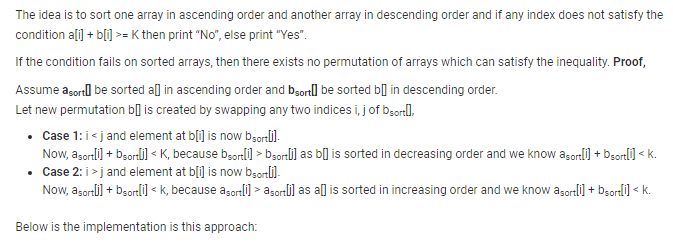

In [101]:
// Check whether any permutation  
// exists which satisfy the condition. 
static boolean isPossible(Integer a[], int b[], 
                                  int n, int k)  
{ 
    // Sort the array a[] in decreasing order. 
    Arrays.sort(a, Collections.reverseOrder()); 
  
    // Sort the array b[] in increasing order. 
    Arrays.sort(b); 
  
    // Checking condition on each index. 
    for (int i = 0; i < n; i++) 
    if (a[i] + b[i] < k) 
        return false; 
  
    return true; 
} 
  
// Driver code 
public static void main(String[] args) { 
    Integer a[] = {2, 1, 3}; 
    int b[] = {7, 8, 9}; 
    int k = 10; 
    int n = a.length; 
  
    if (isPossible(a, b, n, k)) 
    System.out.print("Yes"); 
    else
    System.out.print("No"); 
} 

main(args);

Yes